In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [16]:
d = pd.read_csv('../tcc/data/ecc2_.csv')

dCaso1 = d[(d.data>'2018-05-23') & (d.data<'2018-05-25')]

In [17]:
di = datetime.datetime(2018,5,23,0)
df = datetime.datetime(2018,5,25,0)
dates = []
while di < df:
    dates.append(di)
    di += datetime.timedelta(hours=1)


In [18]:
def converttoobj(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
    return time_obj

In [19]:
box=[]
datas=[]
i=0
while i < 288:
    box.append(list(map(float,dCaso1.iloc[i:i+6,6].to_list())))
    datas.append(list(map(str,dCaso1.iloc[i:i+6,0].to_list()))[-1])
    i+=6
#datas = [converttoobj(time_str) for time_str in datas]

In [20]:
media_horaria=[]
for i in range(len(box)):
    media_horaria.append(np.mean(box[i]))
print(
        'Variancia do período: {} \n'.format(np.var(media_horaria))   
)
print(
        'Desvio padrão do período: {} \n'.format(np.std(media_horaria))
)
print(
        'Média do período: {} \n'.format(np.mean(media_horaria))
)

Variancia do período: 3.5886866018036265 

Desvio padrão do período: 1.8943829079158274 

Média do período: 3.5118402777777775 



In [21]:
newdates=[]
for i in range(len(datas)):
    date_obj = datetime.datetime.strptime(datas[i], '%Y-%m-%d %H:%M:%S')
    newdates.append('{:02d}/{:02d} - {:02d}hrs'.format(date_obj.day,date_obj.month,date_obj.hour))

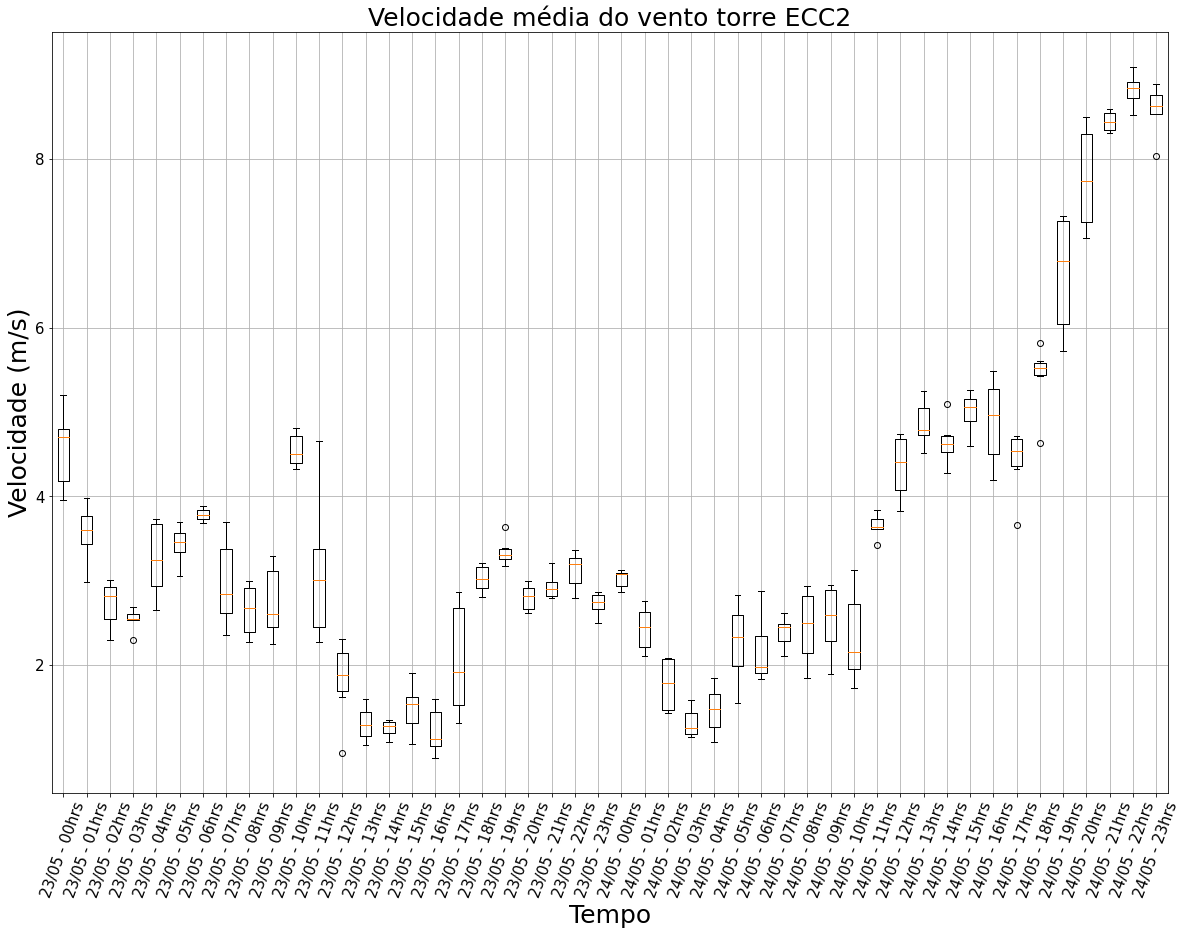

In [22]:
fig = plt.figure(figsize =(20, 14))
# Creating plot
plt.boxplot(x=box, labels=newdates)
degrees = 70
plt.xticks(rotation=degrees)
plt.ylabel("Velocidade (m/s)", fontsize=25)
plt.xlabel("Tempo", fontsize=25)
plt.yticks(fontsize=15)

plt.xticks(fontsize=15)

plt.grid(True)
plt.title("Velocidade média do vento torre ECC2",  fontsize=25)
# show plot
plt.savefig('boxplot2.png',dpi=300)
plt.show()

In [76]:
plt.yticks?